In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection And Procesing

In [2]:
gold_dataset = pd.read_csv('/content/gld_price_data.csv')

In [3]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_dataset.shape

(2290, 6)

In [ ]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
gold_dataset.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [7]:
# getting the statictical  measures of the data
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.   Position Corellation
2.   Negative Corellation


In [8]:
gold_dataset['Date'] = pd.to_datetime(gold_dataset['Date'])
correlation = gold_dataset.select_dtypes(include=['float64', 'int64']).corr()
correlation


,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

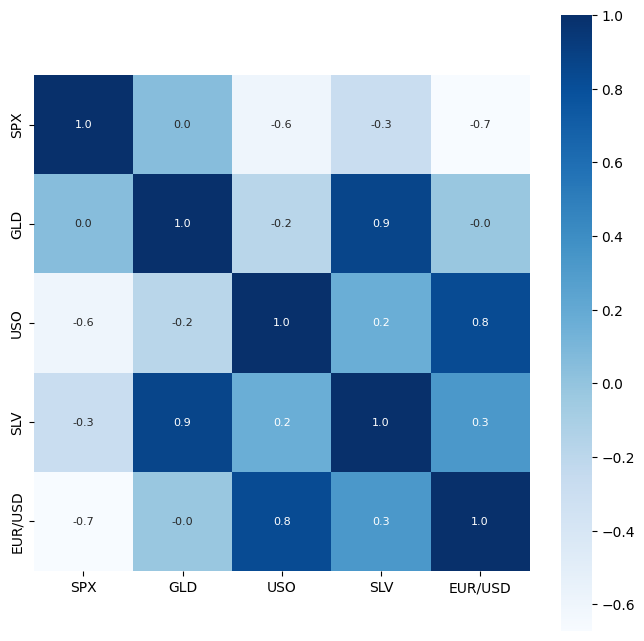

In [9]:
plt.figure(figsize =(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [10]:
#correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-3985916119.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

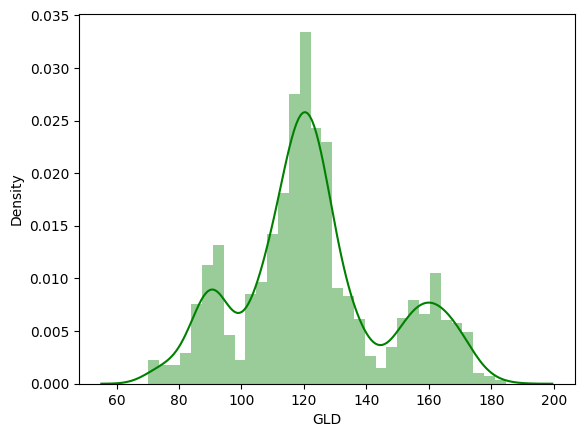

In [16]:
# check the distribustion of the GLD price
sns.distplot(gold_dataset['GLD'],color='green')

splitting the features and Targett

In [17]:
X = gold_dataset.drop(['Date','GLD'],axis=1)
Y = gold_dataset['GLD']

In [18]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [19]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Spliting into training data And test Data

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

TRAINING MODEL

RANDOM FOREST

In [43]:
regressor = RandomForestRegressor()

In [44]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [47]:
# Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [48]:
print(test_data_prediction)

[122.61549944 130.34060338 127.51879951  96.55709754 118.79470074
 114.39729921 124.79010131 117.7170991  108.14190143  98.19369956
  95.49739953 167.86069827 149.03199996 116.12760067 170.83820136
  85.06639978 122.92079874 109.48229695 112.85150068 131.52340266
 124.37259877 113.79310088 115.72920089 108.76829951 108.58610116
 125.77839932 119.51989973 112.31709918 113.41030167 125.5901989
 145.86320147  89.4545999  167.66619962 113.69839924 108.34720105
 120.03230131 142.41899949 161.28080117 173.98949861 153.13900168
 119.36070111 113.60870056 121.27889996 113.78219937 122.16223787
 107.94440076  88.57789901 114.34999954 129.48720245 118.03550094
 103.89800044 129.57010282 107.28729862 160.402304   131.6599004
 118.58589988 146.91540093 135.35080186  95.73720079 124.62860148
 115.38359838  86.29310037 104.26089906 113.95370079  84.23549925
 122.25280008 116.5912993  113.82810215 164.04270291  92.4044
  80.36420102 160.42560064 159.0050027  106.67880033 148.93130125
 109.40349779 12

In [50]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error :",error_score)

R squared error : 0.9893431417212244


Compare the actual values and the predicted values in a plot

In [51]:
Y_test = list(Y_test)

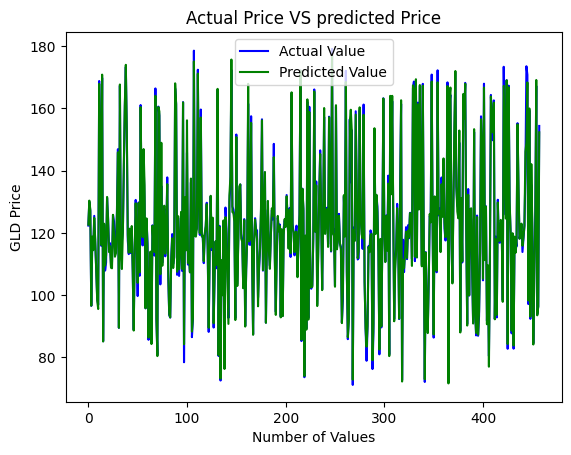

In [56]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price VS predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()